# City street network orientations

Author: [Geoff Boeing](https://geoffboeing.com/)

Compare the spatial orientations of city street networks with OSMnx.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [11]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True)
weight_by_length = False
plt.style.context('seaborn-bright')
ox.__version__

'1.0.1'

In [12]:
# define the study sites as label : query
places = {
          'London' : 'London, UK',
          'Chicago'       : 'Chicago, IL, USA',
          'Los Angeles'   : {'city':'Los Angeles', 'state':'CA', 'country':'USA'},
          'Manhattan'     : 'Manhattan, NYC, NY, USA',
          'San Francisco' : {'city':'San Francisco', 'state':'CA', 'country':'USA'},
         'Paris':'Paris, France',
         'Tokyo':'Tokyo, Japan',
        ' Berlin':'Berlin, Germany',
         'New York':'New York, NY',
         'Munich':'Munich, Germany',
        'Hamburg':'Hamburg',
         'Moscow':'Moscow',
        'Zurich':'Zurich',
        'Madrid':'Madrid',
        'Vienna':'Vienna',
        'Dusseldorf':'Dusseldorf',
        'Stockholm':'Stockholm',
        'Houston':'Houston',
        'Helsinki':'Helsinki',
    'Frankfurt am Main':'Frankfurt am Main',
    'Toronto':'Toronto'
}

In [13]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

geometry  bbox_north  bbox_south  \
0   POLYGON ((-0.51038 51.46809, -0.51036 51.46795...   51.691874   51.286760   
1   POLYGON ((-87.94010 42.00093, -87.94003 41.998...   42.023040   41.644531   
2   POLYGON ((-118.66818 34.18507, -118.66817 34.1...   34.337306   33.659541   
3   MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...   40.880449   40.683941   
4   MULTIPOLYGON (((-123.17382 37.77573, -123.1737...   37.929811   37.640314   
5   POLYGON ((2.22412 48.85420, 2.22412 48.85402, ...   48.902156   48.815576   
6   MULTIPOLYGON (((135.85369 20.42357, 135.86990 ...   35.898424   20.214581   
7   MULTIPOLYGON (((13.08835 52.41963, 13.09021 52...   52.675509   52.338245   
8   MULTIPOLYGON (((-74.25909 40.49721, -74.25903 ...   40.916179   40.477399   
9   MULTIPOLYGON (((11.36078 48.15807, 11.36085 48...   48.248116   48.061624   
10  MULTIPOLYGON (((8.10450 54.02505, 8.21556 53.9...   54.027650   53.395112   
11  MULTIPOLYGON (((37.29050 55.80199, 37.29326 55...   55.957772   55.491308   
12  POLYGON ((8.44801 47.38025, 8.44847 47.37967, ...   47.434666   47.320220   
13  POLYGON ((-3.88895 40.57085, -3.88838 40.56962...   40.643729   40.311977   
14  POLYGON ((16.18183 48.17112, 16.18190 48.17103...   48.322668   48.117907   
15  POLYGON ((6.68881 51.22950, 6.69116 51.22891, ...   51.352532   51.124375   
16  POLYGON ((17.76069 59.39177, 17.76231 59.38878...   59.440284   59.227256   
17  MULTIPOLYGON (((-95.26821 29.95456, -95.26831 ...   30.110351   29.537070   
18  POLYGON ((24.78280 60.09996, 24.81697 60.06209...   60.297850   59.922486   
19  POLYGON ((8.47279 50.09983, 8.47281 50.09981, ...   50.227141   50.015543   
20  POLYGON ((-79.63927 43.74985, -79.63860 43.749...   43.855443   43.580253   

     bbox_east   bbox_west   place_id  osm_type   osm_id        lat  \
0     0.334016   -0.510375  256874343  relation    65606  51.507322   
1   -87.524081  -87.940101  304986178  relation   122604  41.875562   
2  -118.155295 -118.668178  256916832  relation   207359  34.053691   
3   -73.906159  -74.047222  257878623  relation  8398124  40.789624   
4  -122.281479 -123.173825  256882913  relation   111968  37.779026   
5     2.469760    2.224122  256856867  relation     7444  48.856697   
6   154.205541  135.853686  257057375  relation  1543125  35.682839   
7    13.761161   13.088345  256873689  relation    62422  52.501522   
8   -73.700181  -74.259090  256907472  relation   175905  40.712728   
9    11.722908   11.360777  256860887  relation    62428  48.137108   
10   10.325280    8.104499  256862503  relation    62782  53.550341   
11   37.967428   37.290502  257187086  relation  2555133  55.750446   
12    8.625441    8.448006  257078559  relation  1682248  47.374449   
13   -3.517916   -3.888954  257486229  relation  5326784  40.416705   
14   16.577513   16.181831  256900090  relation   109166  48.208354   
15    6.939885    6.688815  256861688  relation    62539  51.225402   
16   18.200067   17.760692  256953033  relation   398021  59.337119   
17  -95.012052  -95.909742  257204280  relation  2688911  29.758938   
18   25.254512   24.782803  256862871  relation    34914  60.167488   
19    8.800472    8.472793  256873676  relation    62400  50.110644   
20  -79.113219  -79.639273  256931720  relation   324211  43.653482   

           lon                                       display_name     class  \
0    -0.127647    London, Greater London, England, United Kingdom  boundary   
1   -87.624421      Chicago, Cook County, Illinois, United States     place   
2  -118.242766  Los Angeles, Los Angeles County, California, U...  boundary   
3   -73.959894  Manhattan, New York County, New York, United S...  boundary   
4  -122.419906           San Francisco, California, United States  boundary   
5     2.351462  Paris, Ile-de-France, Metropolitan France, France  boundary   
6   139.759455                                       Tokyo, Japan  boundary   
7    13.402550                                    Berlin, Germany  

In [14]:
gdf = gdf.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})

In [15]:
gdf['centroid'] = gdf['geometry'].centroid

<ipython-input-15-86b40a8bbe24>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


In [16]:
gdf.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((-0.51038 51.46809, -0.51036 51.46795...   51.691874   51.286760   
1  POLYGON ((-87.94010 42.00093, -87.94003 41.998...   42.023040   41.644531   
2  POLYGON ((-118.66818 34.18507, -118.66817 34.1...   34.337306   33.659541   
3  MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...   40.880449   40.683941   
4  MULTIPOLYGON (((-123.17382 37.77573, -123.1737...   37.929811   37.640314   

    bbox_east   bbox_west   place_id  osm_type   osm_id        lat  \
0    0.334016   -0.510375  256874343  relation    65606  51.507322   
1  -87.524081  -87.940101  304986178  relation   122604  41.875562   
2 -118.155295 -118.668178  256916832  relation   207359  34.053691   
3  -73.906159  -74.047222  257878623  relation  8398124  40.789624   
4 -122.281479 -123.173825  256882913  relation   111968  37.779026   

          lon                                       display_name     class  \
0   -0.127647    London, Greater London, England, United Kingdom  boundary   
1  -87.624421      Chicago, Cook County, Illinois, United States     place   
2 -118.242766  Los Angeles, Los Angeles County, California, U...  boundary   
3  -73.959894  Manhattan, New York County, New York, United S...  boundary   
4 -122.419906           San Francisco, California, United States  boundary   

             type  importance                     centroid  
0  administrative    0.940783    POINT (-0.10941 51.50050)  
1            city    0.961530   POINT (-87.68569 41.83806)  
2  administrative    1.073805  POINT (-118.40723 34.08954)  
3  administrative    0.785439   POINT (-73.96683 40.77814)  
4  administrative    1.025131  POINT (-122.69405 37.75986)

In [17]:
query = ( 51.50050, -0.10941 ) #London
query = ( 51.50050, -0.10941 ) #London
G = ox.graph_from_point(query, network_type='all', dist=1000)

In [18]:
# fig, ax = ox.plot_graph(G)
# plt.tight_layout()

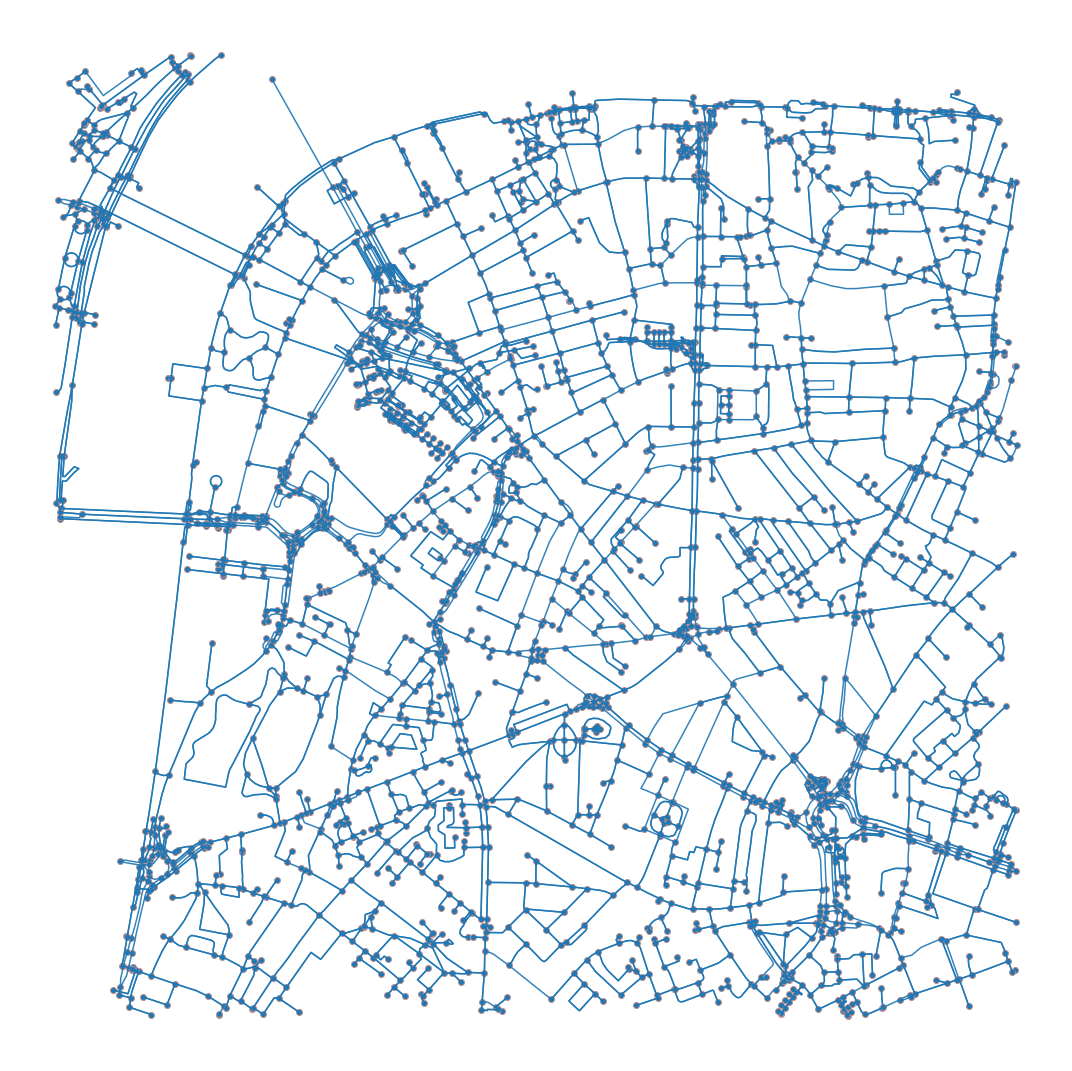

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
nodes, edges = ox.graph_to_gdfs(G)
# area.plot(ax=ax)
nodes.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')
edges.plot(ax=ax, alpha=0.9)
plt.tight_layout()

In [20]:
# ox.plot_graph(ox.graph_from_place('Modena, Italy'))

## Get the street networks and their edge bearings

In [21]:
def reverse_bearing(x):
    return x + 180 if x < 180 else x - 180

In [22]:
bearings = {}
for index,row in gdf.iterrows():
    print(datetime.datetime.now(), row['display_name'])
    place = row['display_name']
    # get the graph
    query = (row['centroid'].y , row['centroid'].x)
    print(query)
    try:
        G = ox.graph_from_point(query, network_type='all', dist=1000 )
    except:
        G = ox.graph_from_place(place, network_type='drive')
    
#     # calculate edge bearings
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    weight_by_length = True
    if weight_by_length:
        # weight bearings by length (meters)
        city_bearings = []
        for u, v, k, d in Gu.edges(keys=True, data=True):
            city_bearings.extend([d['bearing']] * int(d['length']))
        b = pd.Series(city_bearings)
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')
    else:
        # don't weight bearings, just take one value per street segment
        b = pd.Series([d['bearing'] for u, v, k, d in Gu.edges(keys=True, data=True)])
        bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')

2021-04-20 12:41:09.485002 London, Greater London, England, United Kingdom
(51.50049621880653, -0.10941486824873822)
2021-04-20 12:41:16.383782 Chicago, Cook County, Illinois, United States
(41.83806262743144, -87.6856901236271)
2021-04-20 12:41:18.028331 Los Angeles, Los Angeles County, California, United States
(34.089542312879374, -118.40723474039848)
2021-04-20 12:41:20.691673 Manhattan, New York County, New York, United States
(40.778139752735335, -73.96683192657126)
2021-04-20 12:41:25.822569 San Francisco, California, United States
(37.759855993155426, -122.69405382777528)
2021-04-20 12:41:52.506384 Paris, Ile-de-France, Metropolitan France, France
(48.8566223741575, 2.342875976259881)
2021-04-20 12:41:57.111306 Tokyo, Japan
(29.99223657839541, 140.76723749314795)
2021-04-20 12:56:10.949562 Berlin, Germany
(52.501493902617, 13.402316483808221)
2021-04-20 12:56:18.047356 New York, United States
(40.663685638031815, -73.93863277956545)
2021-04-20 12:56:19.288534 Munich, Bavaria, G

In [23]:
# bearings = {}
# for place in sorted(places.keys()):
#     print(datetime.datetime.now(), place)
    
#     # get the graph
#     query = places[place]
#     G = ox.graph_from_place(query, network_type='drive')
    
#     # calculate edge bearings
#     Gu = ox.add_edge_bearings(ox.get_undirected(G))
    
#     if weight_by_length:
#         # weight bearings by length (meters)
#         city_bearings = []
#         for u, v, k, d in Gu.edges(keys=True, data=True):
#             city_bearings.extend([d['bearing']] * int(d['length']))
#         b = pd.Series(city_bearings)
#         bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')
#     else:
#         # don't weight bearings, just take one value per street segment
#         b = pd.Series([d['bearing'] for u, v, k, d in Gu.edges(keys=True, data=True)])
#         bearings[place] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')

## Visualize it

In [24]:
def count_and_merge(n, bearings):
    # make twice as many bins as desired, then merge them in pairs
    # prevents bin-edge effects around common values like 0° and 90°
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins)
    
    # move the last bin to the front, so eg 0.01° and 359.99° will be binned together
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

In [25]:
# function to draw a polar histogram for a set of edge bearings
def polar_plot(ax, bearings, n=36, title=''):

    bins = np.arange(n + 1) * 360 / n
    count = count_and_merge(n, bearings)
    hist , division = np.histogram(bearings, bins=bins , density = True) 
    frequency = count / count.sum()
    division = division[0:-1]
    width =  2 * np.pi / n

    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')

    x = division * np.pi / 180
    bars = ax.bar(x, height=frequency, width=width, align='center', bottom=0, zorder=2,
                  color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7)
    
    ax.set_ylim(top=frequency.max())
    
    title_font = {'family':'DejaVu Sans', 'size':24, 'weight':'bold'}
    xtick_font = {'family':'DejaVu Sans', 'size':10, 'weight':'bold', 'alpha':1.0, 'zorder':3}
    ytick_font = {'family':'DejaVu Sans', 'size': 9, 'weight':'bold', 'alpha':0.2, 'zorder':3}
    
    ax.set_title(title.upper(), y=1.05, fontdict=title_font)
    
    ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
    yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
    yticklabels[0] = ''
    ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
    
    xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)
    ax.tick_params(axis='x', which='major', pad=-2)
    return frequency

In [26]:
bearings.keys()

dict_keys(['London, Greater London, England, United Kingdom', 'Chicago, Cook County, Illinois, United States', 'Los Angeles, Los Angeles County, California, United States', 'Manhattan, New York County, New York, United States', 'San Francisco, California, United States', 'Paris, Ile-de-France, Metropolitan France, France', 'Tokyo, Japan', 'Berlin, Germany', 'New York, United States', 'Munich, Bavaria, Germany', 'Hamburg, Germany', 'Moscow, Central Federal District, Russia', 'Zurich, District Zurich, Zurich, Switzerland', 'Madrid, Área metropolitana de Madrid y Corredor del Henares, Community of Madrid, 28001, Spain', 'Vienna, Austria', 'Dusseldorf, North Rhine-Westphalia, Germany', 'Stockholms kommun, Stockholm County, Sweden', 'Houston, Harris County, Texas, United States', 'Helsinki, Helsinki sub-region, Uusimaa, Southern Finland, Mainland Finland, Finland', 'Frankfurt, Hesse, Germany', 'Toronto, Golden Horseshoe, Ontario, Canada'])

In [27]:
# ordered_keys = ['London, Greater London, England, United Kingdom', 'Helsinki, Helsinki sub-region, Uusimaa, Southern Finland, Mainland Finland, Finland','New York, United States','Hamburg, Germany']

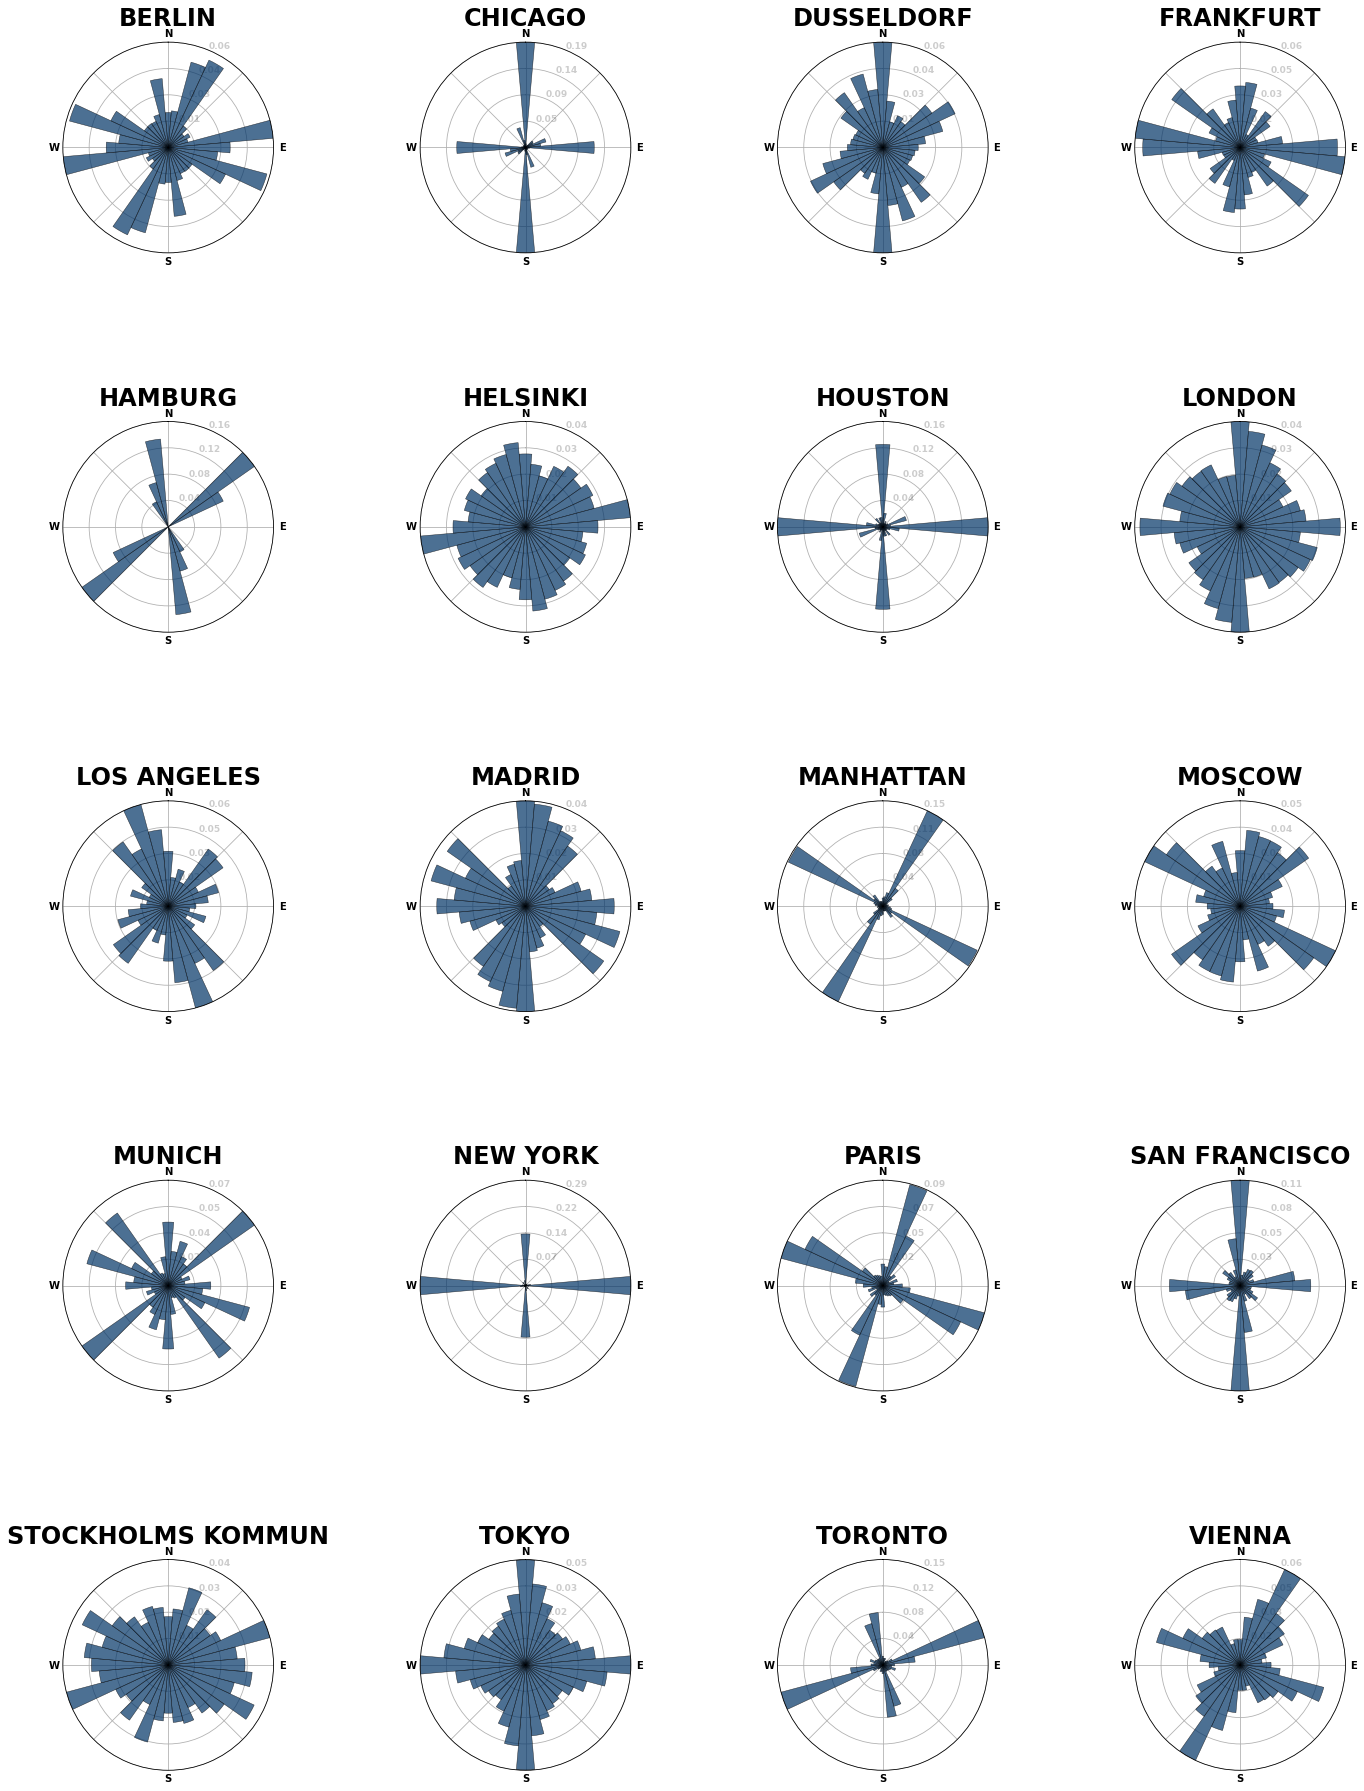

In [28]:
# # create figure and axes
n = len(places)
ncols = 4
nrows = 5
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={'projection':'polar'})
normed_freq = {}
# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(bearings.keys())):
# for ax, place in zip(axes.flat, ordered_keys):
    
    normed_freq[place] = polar_plot(ax, bearings[place].dropna(), title=place.split(',')[0])

# add super title and save full image
suptitle_font = {'family':'DejaVu Sans', 'fontsize':60, 'fontweight':'normal', 'y':1.07}
# fig.suptitle('City Street Network Orientation', **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.8)
fig.savefig('images/street-orientations.pdf', dpi=120, bbox_inches='tight')
plt.show()

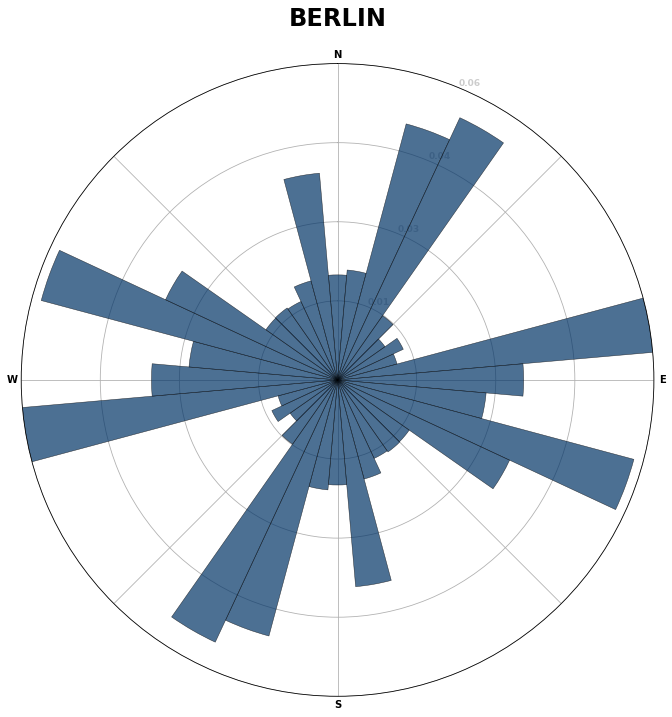

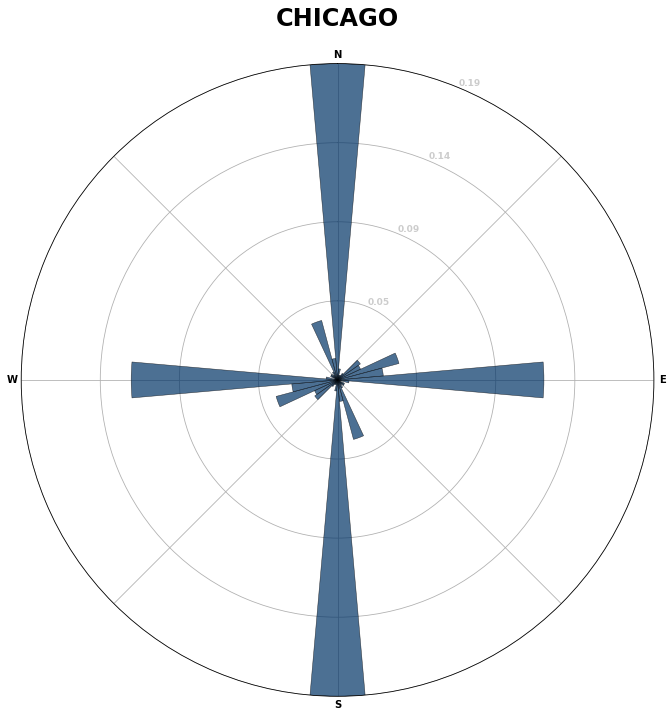

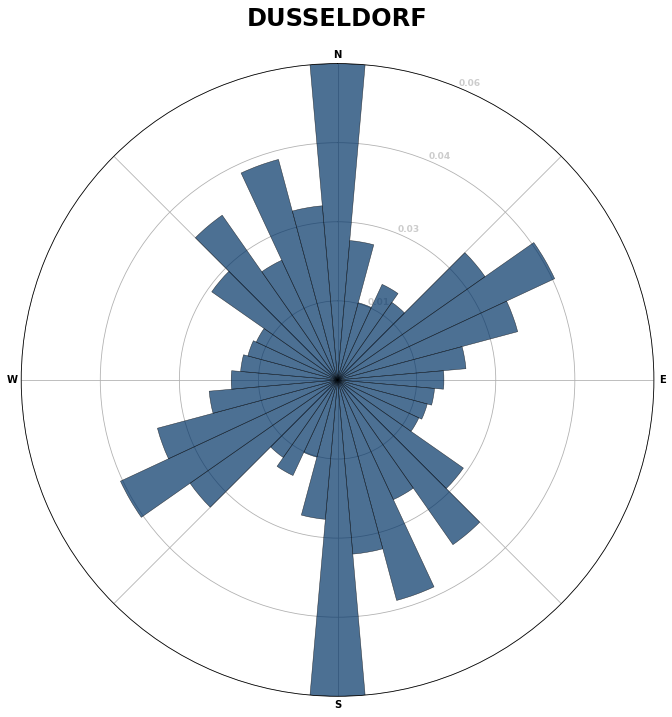

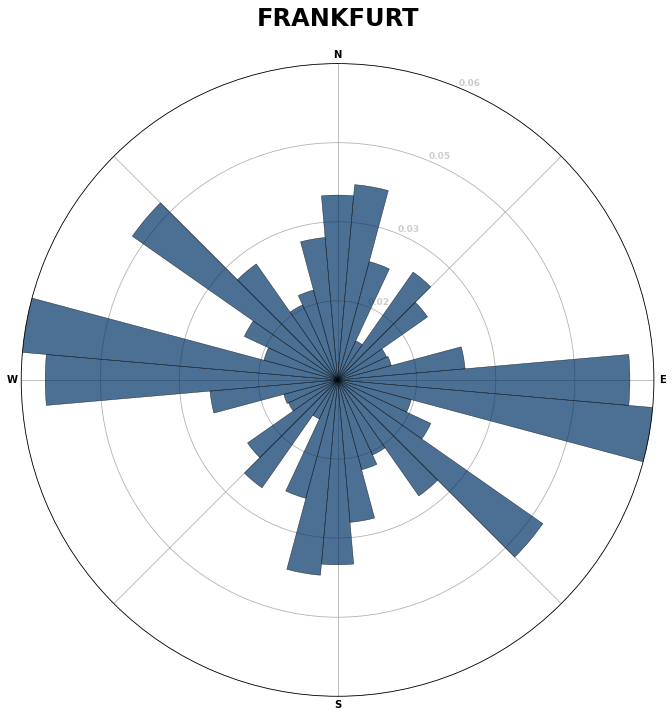

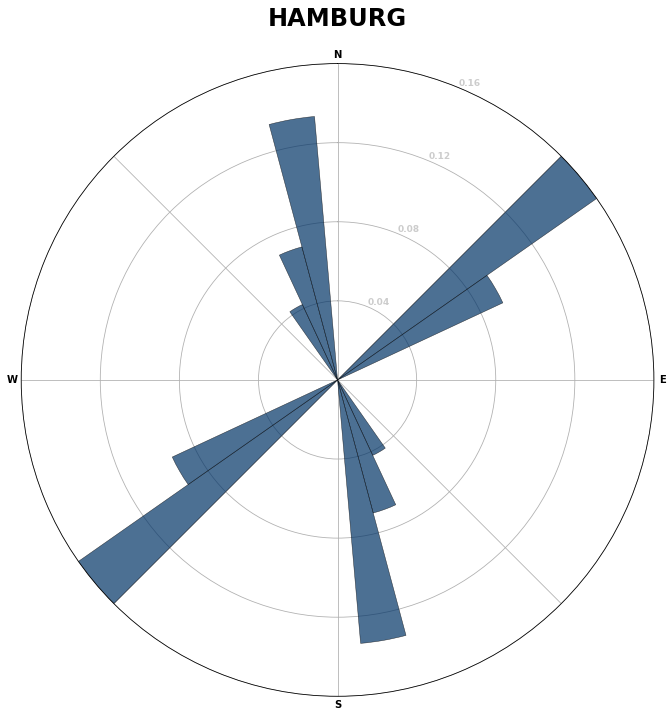

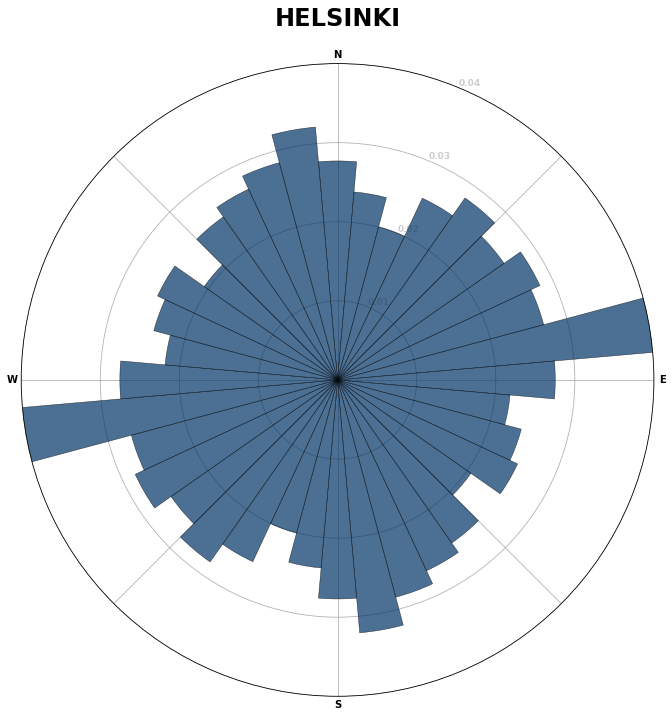

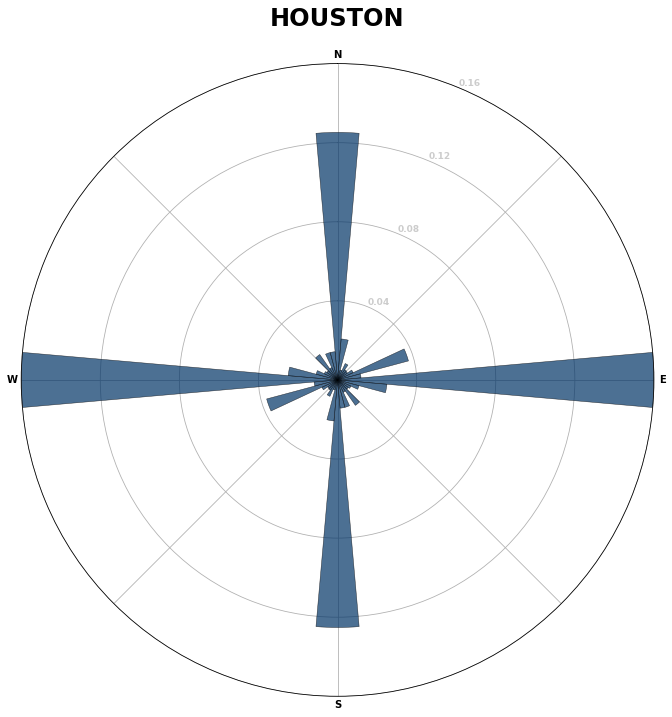

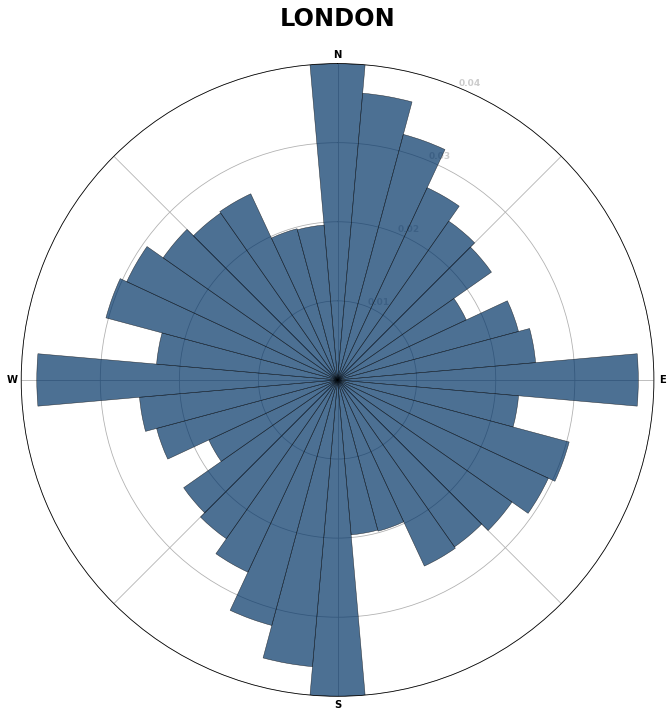

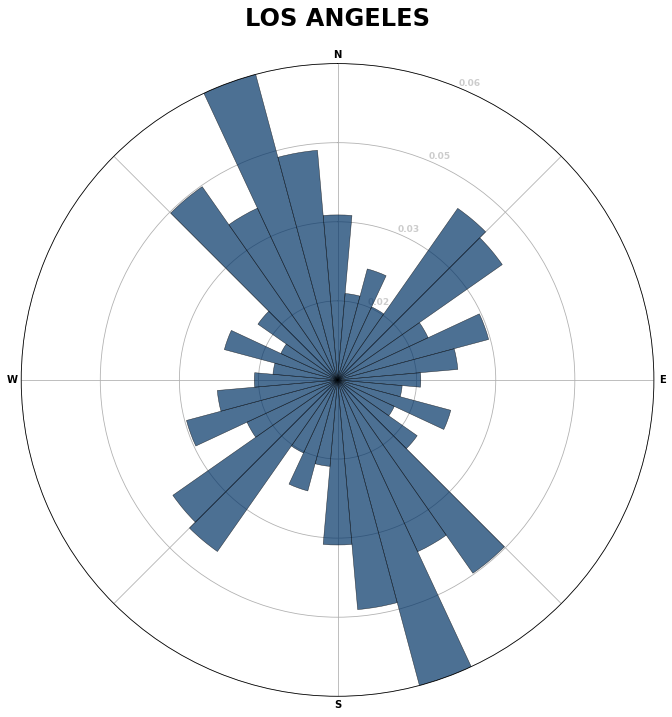

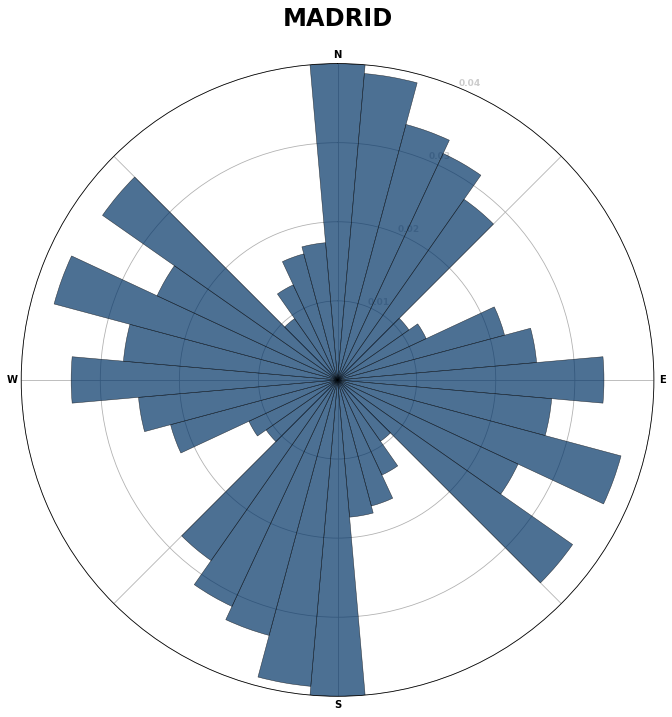

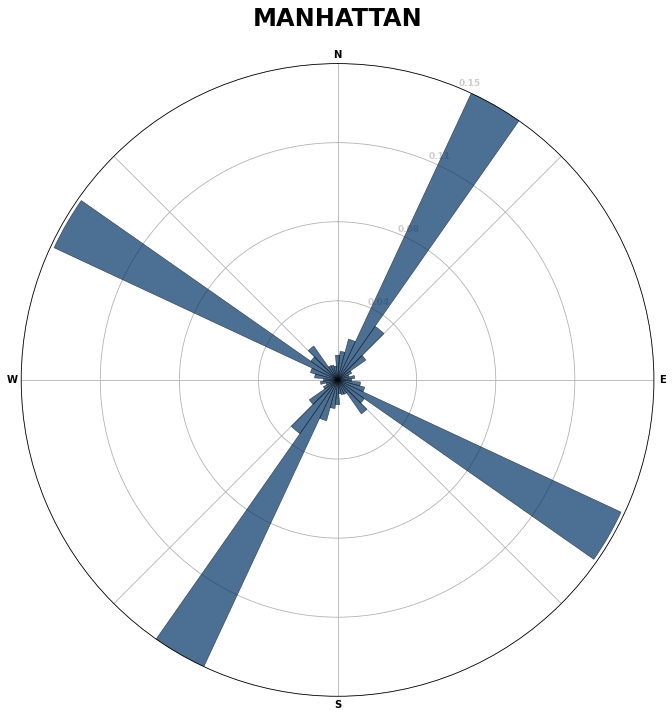

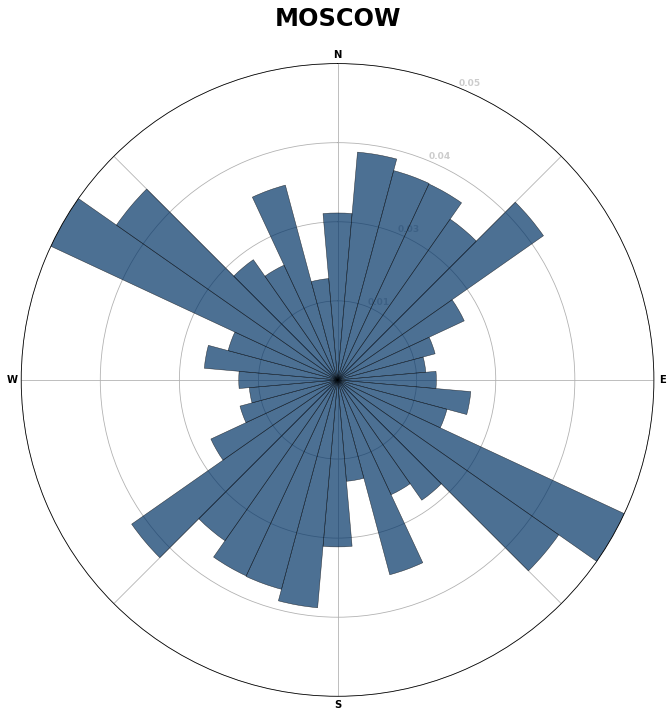

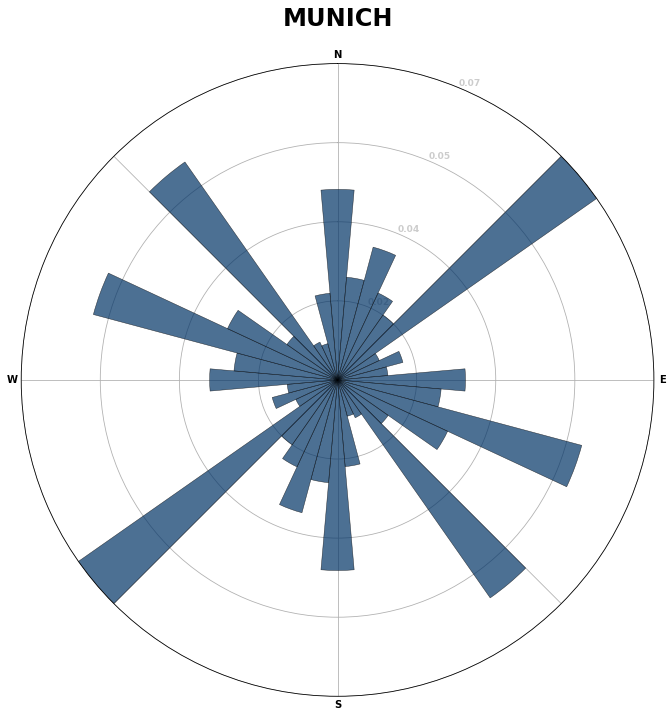

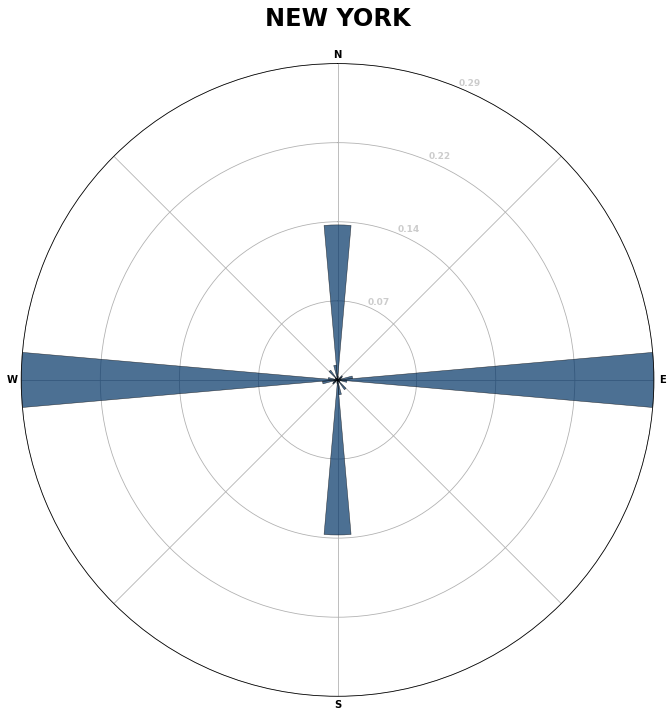

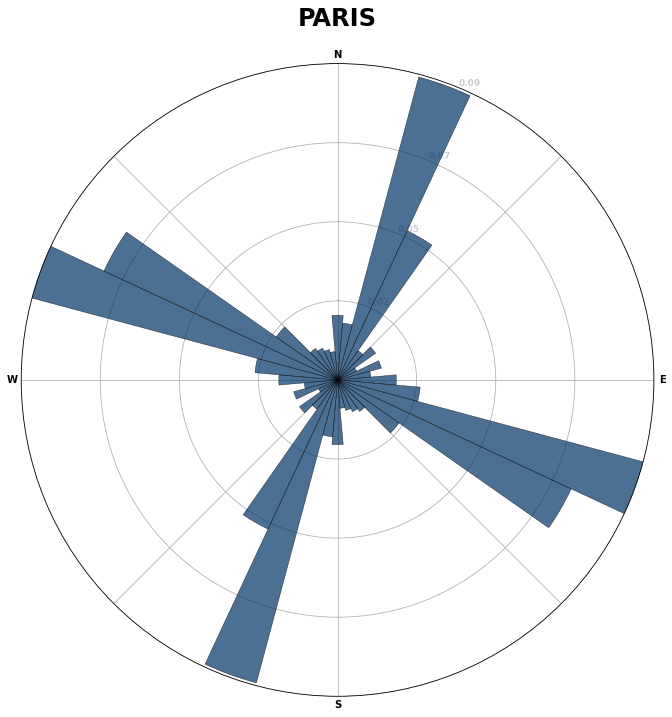

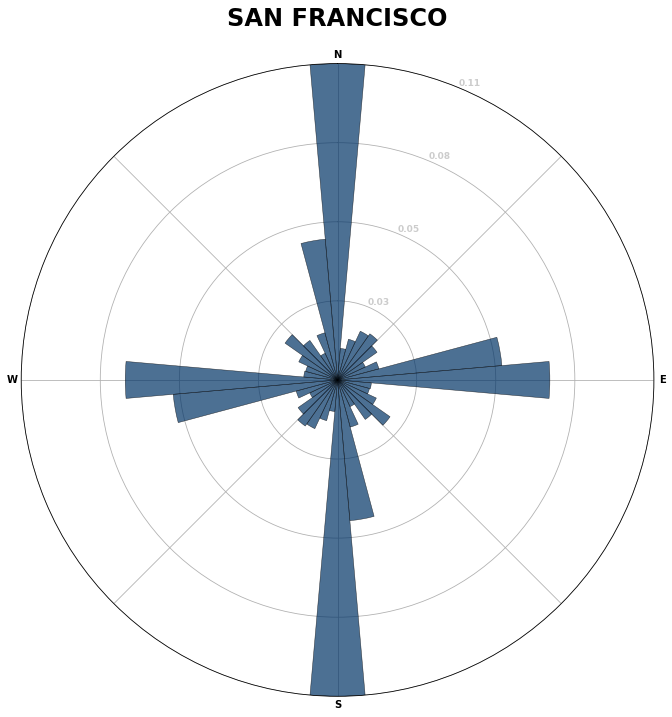

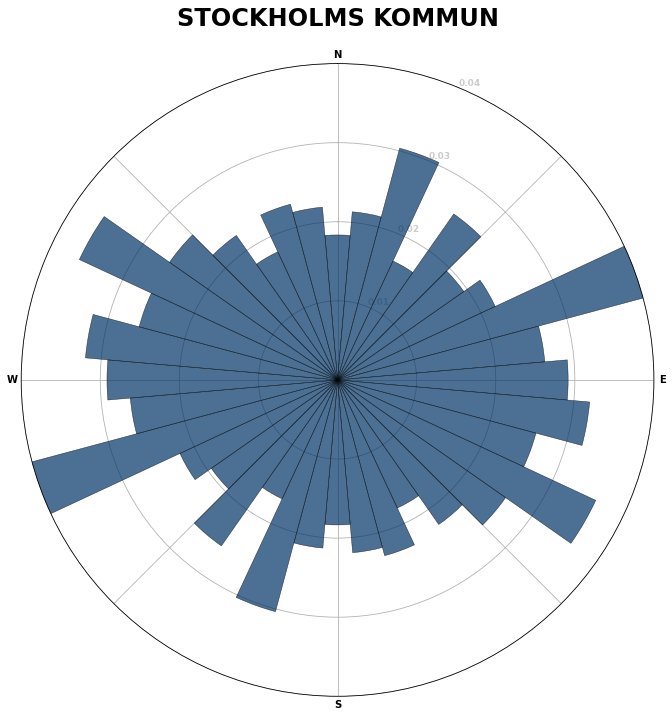

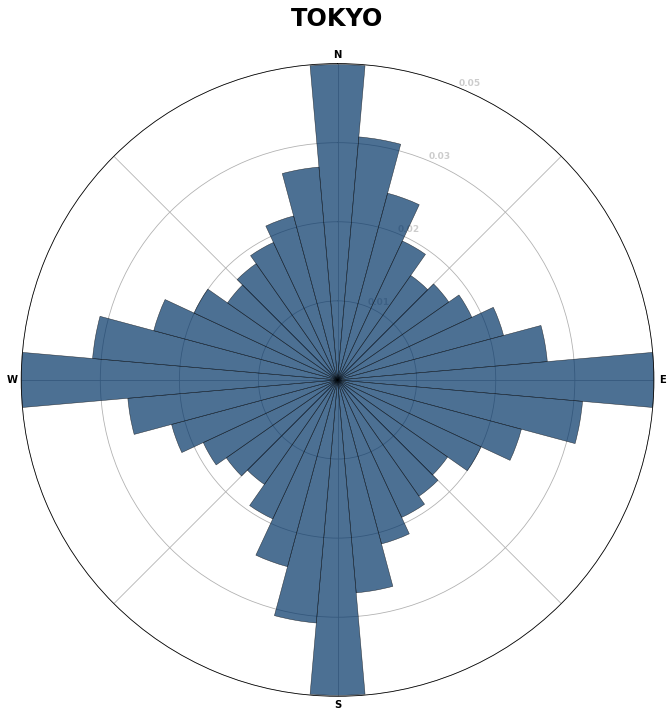

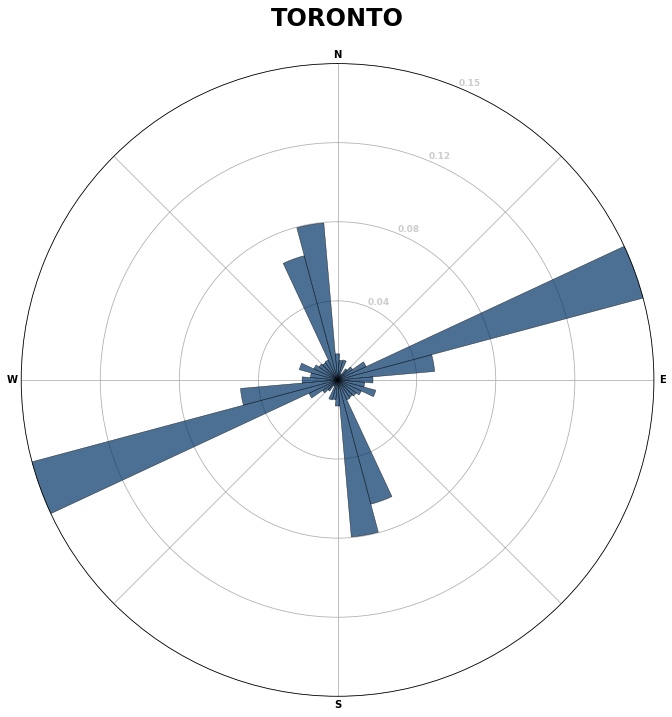

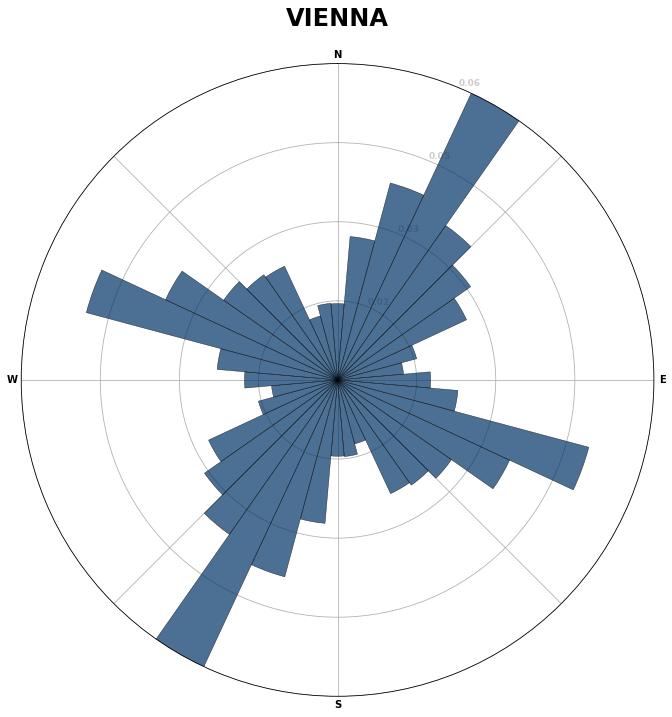

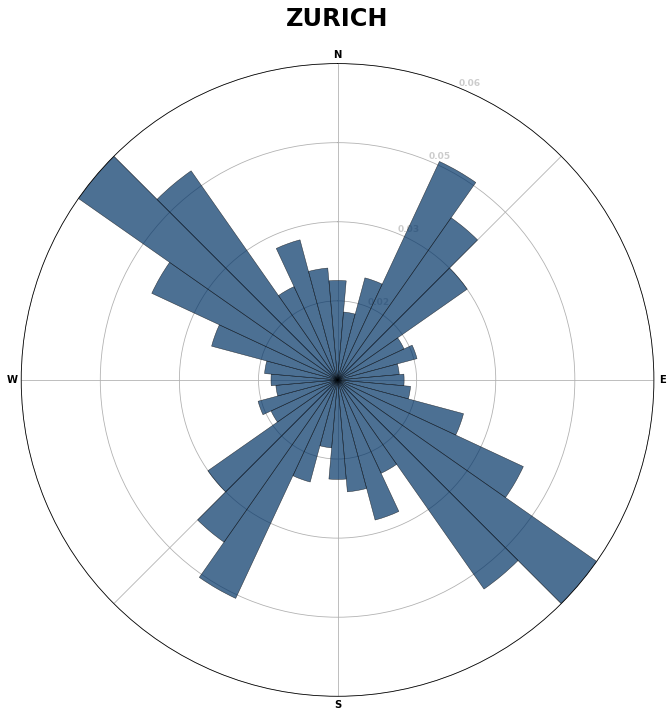

In [29]:
figsize = (10, 10)
for place in sorted(bearings.keys()):
    fig , axes = plt.subplots(1, 1, figsize=figsize, subplot_kw={'projection':'polar'})
    polar_plot(axes, bearings[place].dropna(), title=place.split(',')[0])
    suptitle_font = {'family':'DejaVu Sans', 'fontsize':60, 'fontweight':'normal', 'y':1.07}
    # fig.suptitle('City Street Network Orientation', **suptitle_font)
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.8)
    fig.savefig('images/'+  place +'.pdf', dpi=220, bbox_inches='tight')
    plt.show()

In [30]:
normed_freq

{'Berlin, Germany': array([0.01903053, 0.01999005, 0.0480161 , 0.05240947, 0.01420626,
        0.01048811, 0.01314013, 0.01114556, 0.05730037, 0.03370767,
        0.02701322, 0.0555679 , 0.03437844, 0.01584545, 0.01591652,
        0.01568108, 0.01857742, 0.03758574, 0.01903053, 0.01999005,
        0.0480161 , 0.05240947, 0.01420626, 0.01048811, 0.01314013,
        0.01114556, 0.05730037, 0.03370767, 0.02701322, 0.0555679 ,
        0.03437844, 0.01584545, 0.01591652, 0.01568108, 0.01857742,
        0.03758574]),
 'Chicago, Cook County, Illinois, United States': array([0.18776014, 0.00662488, 0.00284397, 0.00309272, 0.00477588,
        0.01654147, 0.01507388, 0.03773444, 0.02726233, 0.12248147,
        0.00684046, 0.00156709, 0.00454372, 0.00475101, 0.00346583,
        0.00529824, 0.03654876, 0.01279373, 0.18776014, 0.00662488,
        0.00284397, 0.00309272, 0.00477588, 0.01654147, 0.01507388,
        0.03773444, 0.02726233, 0.12248147, 0.00684046, 0.00156709,
        0.00454372, 0.0047

In [31]:
EntropyDict = {'city':[] , 'street_entropy':[]}
for place in normed_freq:
    EntropyDict['city'].append(place.split(',')[0].strip())
    entropy = -sum([float(p)*np.log(float(p)) for p in normed_freq[place] if p >0.])
    EntropyDict['street_entropy'].append(entropy)

df = pd.DataFrame.from_dict(EntropyDict)

In [140]:
df = df.sort_values(['street_entropy'], ascending=[1])

In [32]:
df.head(n=5)

city  street_entropy
0      Berlin        3.430909
1     Chicago        2.671477
2  Dusseldorf        3.506124
3   Frankfurt        3.440617
4     Hamburg        2.207576

In [143]:
df.to_csv('../City_entroy.csv',index=False)